# Capstone 2 Modeling

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('df_new.csv')
df.head()

,MEMBER_alt,revised,hasReassignedSchools,altRatio_99,altRatio,altRatio_growth,pupMONEY_reg,pupMONEY_alt,pdiff_pupMONEY,hasCounc_reg,...,RI,SD,TN,TX,UT,VA,WA,WI,WV,WY
0,-0.097866,-0.072301,-0.539077,-0.374959,-0.318339,0.098151,-0.148202,3.072690,3.189225,0.502815,...,0,0,0,0,0,0,0,0,0,0
1,-0.057271,-0.072301,1.855023,-0.374959,-0.438938,-0.131308,-0.334664,-0.226827,-0.101269,-0.044831,...,0,0,0,0,0,0,0,0,0,0
2,-0.027265,-0.072301,-0.539077,-0.292595,-0.445189,-0.286872,-0.266687,-0.084244,0.037768,0.502815,...,0,0,0,0,0,0,0,0,0,0
3,0.525183,-0.072301,1.855023,-0.285879,-0.401530,-0.215518,-0.249242,-0.198305,-0.127062,-1.107908,...,0,0,0,0,0,0,0,0,0,0
4,-0.046681,-0.072301,-0.539077,-0.138681,-0.396269,-0.462270,-0.164999,-0.117499,-0.087721,0.502815,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 67 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MEMBER_alt                370 non-null    float64
 1   revised                   370 non-null    float64
 2   hasReassignedSchools      370 non-null    float64
 3   altRatio_99               369 non-null    float64
 4   altRatio                  370 non-null    float64
 5   altRatio_growth           369 non-null    float64
 6   pupMONEY_reg              370 non-null    float64
 7   pupMONEY_alt              364 non-null    float64
 8   pdiff_pupMONEY            364 non-null    float64
 9   hasCounc_reg              370 non-null    float64
 10  hasCounc_alt              364 non-null    float64
 11  pdiff_hasCounc            358 non-null    float64
 12  puptch_reg                332 non-null    float64
 13  puptch_alt                330 non-null    float64
 14  pdiff_pupt

In [4]:
# number of rows with missing data
df.isnull().any(axis=1).sum()

71

In [5]:
# fill missing values with median of that column 
df.altRatio_99.fillna(df.altRatio_99.median(), inplace=True)
df.altRatio_growth.fillna(df.altRatio_growth.median(), inplace=True)
df.pupMONEY_alt.fillna(df.pupMONEY_alt.median(), inplace=True)
df.pdiff_pupMONEY.fillna(df.pdiff_pupMONEY.median(), inplace=True)
df.hasCounc_alt.fillna(df.hasCounc_alt.median(), inplace=True)
df.pdiff_hasCounc.fillna(df.pdiff_hasCounc.median(), inplace=True)
df.puptch_reg.fillna(df.puptch_reg.median(), inplace=True)
df.puptch_alt.fillna(df.puptch_alt.median(), inplace=True)
df.pdiff_puptch.fillna(df.pdiff_puptch.median(), inplace=True)
df.TEACH_FYSY_RATIO_reg.fillna(df.TEACH_FYSY_RATIO_reg.median(), inplace=True)
df.TEACH_FYSY_RATIO_alt.fillna(df.TEACH_FYSY_RATIO_alt.median(), inplace=True)
df.pdiff_TEACH_FYSY_RATIO.fillna(df.pdiff_TEACH_FYSY_RATIO.median(), inplace=True)
df.TEACH_ABSENT_RATIO_reg.fillna(df.TEACH_ABSENT_RATIO_reg.median(), inplace=True)
df.TEACH_ABSENT_RATIO_alt.fillna(df.TEACH_ABSENT_RATIO_alt.median(), inplace=True)
df.pdiff_TEACH_ABSENT_RATIO.fillna(df.pdiff_TEACH_ABSENT_RATIO.median(), inplace=True)

In [6]:
# Split into testing and training datasets
from sklearn.model_selection import train_test_split
X = df.drop(['gradRate_reg', 'gradRate_alt', 'ppdiff_gradRate', 'ppdiff_gradRate_ind'], axis=1)
y = df['ppdiff_gradRate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=629)

## Fit models with a training dataset 

Hint: Try a number of different models: you will want to compare their outputs in the
model evaluation stage. For example, if you’re writing a classification model, you should
implement both an entropy model and a Gini impurity model. For hyperparameter tuning,
think of methods like cross-validation . 

In [7]:
# Model 1 - Linear Regression 
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)

y_tr_pred = lm.predict(X_train)
y_te_pred = lm.predict(X_test)

In [8]:
# Model 2 - Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rfm = RandomForestRegressor(max_depth=3, random_state = 1234).fit(X_train, y_train)

y_rfm_tr_pred = rfm.predict(X_train)
y_rfm_te_pred = rfm.predict(X_test)

## Review model outcomes — Iterate over additional models as needed 

Hint: you may want to use standard model evaluation metrics such as accuracy, recall,
precision, and F1. 

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

print("Linear Model")
# r^2 - train, test
lm_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
print("R Squared Score on train and test", lm_r2)

# MSE - train, test
lm_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
print("Mean Squared Error on train and test", lm_mse)

Linear Model
R Squared Score on train and test (0.49189968041520526, -0.09474119598750086)
Mean Squared Error on train and test (0.5349607218264781, 0.9462150498239909)


In [21]:
list(zip(X_train.columns, lm.coef_))
coeffdf = pd.DataFrame(X_train.columns, columns=['features'])
coeffdf['coeff'] = lm.coef_
coeffdf.sort_values('coeff', ascending=False)

,features,coeff
4,altRatio,116.885144
13,puptch_alt,3.128666
55,TN,1.873478
29,DE,1.841043
53,RI,1.803189
...,...,...
12,puptch_reg,-1.096861
24,AZ,-1.137825
14,pdiff_puptch,-3.480491
5,altRatio_growth,-61.311042


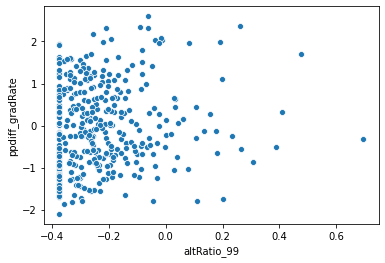

In [24]:
sns.scatterplot(x='altRatio_99', y='ppdiff_gradRate', data=df)

In [10]:
print("Random Forest Model - max depth 3")
# r^2 - train, test
rfm_r2 = r2_score(y_train, y_rfm_tr_pred), r2_score(y_test, y_rfm_te_pred)
print("R Squared Score on train and test", rfm_r2)

# MSE - train, test
rfm_mse = mean_squared_error(y_train, y_rfm_tr_pred), mean_squared_error(y_test, y_rfm_te_pred)
print("Mean Squared Error on train and test", rfm_mse)

Random Forest Model - max depth 3
R Squared Score on train and test (0.3862476516451747, 0.10621497121827073)
Mean Squared Error on train and test (0.6461979783183331, 0.772523084579615)


In [28]:
coeffdf['feature importance']=rfm.feature_importances_
coeffdf.sort_values('feature importance', ascending=False).head(10)

,features,coeff,feature importance
25,CA,0.727529,0.133697
30,FL,-1.089749,0.112721
12,puptch_reg,-1.096861,0.104959
15,TEACH_FYSY_RATIO_reg,0.111578,0.087158
0,MEMBER_alt,0.043561,0.085253
56,TX,0.377802,0.071793
6,pupMONEY_reg,-0.077452,0.064600
17,pdiff_TEACH_FYSY_RATIO,-0.340961,0.048679
7,pupMONEY_alt,0.105669,0.035621
3,altRatio_99,-107.006864,0.031305


## Identify the final model that you think is the best model for this project 

Hint: the most powerful model isn’t always the best one to use. Other considerations
include computational complexity, scalability, and maintenance costs. 